In [42]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [43]:
dataframe = pd.read_csv("../bloomberg_values.csv")
print(dataframe)

          Date  EUDR1T Curncy  EUR001M Index  EUR003M Index  EUR006M Index  \
0     1/3/2000         3.0300          3.171          3.338          3.523   
1     1/4/2000         3.0100          3.159          3.343          3.553   
2     1/5/2000         2.9700          3.151          3.341          3.550   
3     1/6/2000         2.8700          3.131          3.331          3.552   
4     1/7/2000         2.8750          3.116          3.322          3.546   
...        ...            ...            ...            ...            ...   
6565  3/3/2025         2.7200          2.466          2.464          2.331   
6566  3/4/2025         2.6974          2.471          2.491          2.342   
6567  3/5/2025         2.6800          2.494          2.504          2.353   
6568  3/6/2025         2.7200          2.481          2.511          2.394   
6569  3/7/2025         2.7225          2.481          2.511          2.394   

      EUR009M Index  EREU001W Index  ER1 Comdty  ER2 Comdty  ER

In [44]:
targets = ["USGG3M Index", "USGG2YR Index", "USGG10YR Index", "USGG30YR Index"]
predictors = ["SPX Index", "VIX Index", "GDP CQOQ Index", "CPI XYOY Index", "NAPMPMI Index", "IP  CHNG Index", "CPTICHNG Index", "USURTOT Index", "NFP TCH Index", "INJCJC Index", "LEI CHNG Index"]
date = ["Date"]

columns_subset = targets + predictors

data_subset = dataframe[columns_subset]
date = dataframe["Date"]
df = data_subset.dropna()
#df.set_index(date, inplace=True)

predictor_set1 = df[targets]
target_set1 = df[predictors]

In [45]:
df.head()

,USGG3M Index,USGG2YR Index,USGG10YR Index,USGG30YR Index,SPX Index,VIX Index,GDP CQOQ Index,CPI XYOY Index,NAPMPMI Index,IP CHNG Index,CPTICHNG Index,USURTOT Index,NFP TCH Index,INJCJC Index,LEI CHNG Index
0,5.411,6.384,6.592,6.622,1455.22,24.21,6.7,1.9,57.8,0.8,82.4391,4.0,316,286,1.1
1,5.447,6.299,6.497,6.537,1399.42,27.01,6.7,1.9,57.8,0.8,82.4391,4.0,316,286,1.1
2,5.425,6.358,6.594,6.621,1402.11,26.41,6.7,1.9,57.8,0.8,82.4391,4.0,316,286,1.1
3,5.383,6.299,6.524,6.553,1403.45,25.73,6.7,1.9,57.8,0.8,82.4391,4.0,316,286,1.1
4,5.380,6.308,6.515,6.546,1441.47,21.72,6.7,1.9,57.8,0.8,82.4391,4.0,316,298,1.1


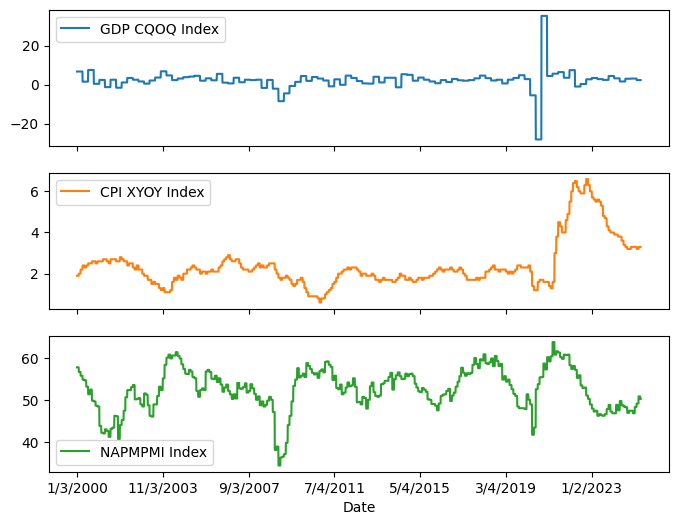

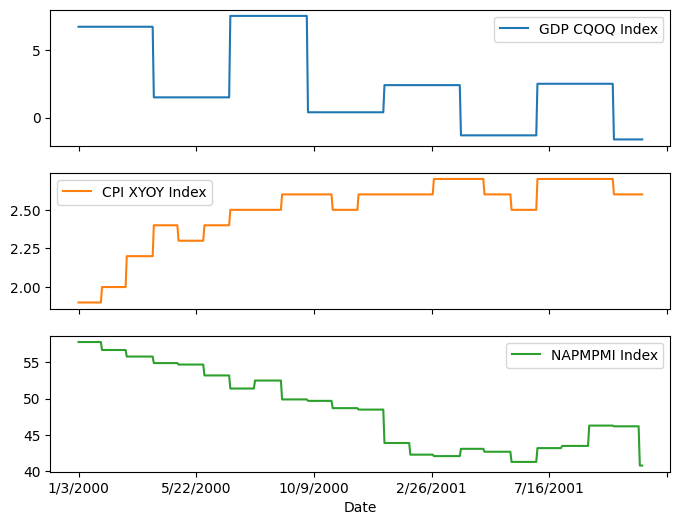

In [46]:
plot_cols = ['GDP CQOQ Index', 'CPI XYOY Index', 'NAPMPMI Index']
plot_features = df[plot_cols]
plot_features.index = date
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = date[:480]
_ = plot_features.plot(subplots=True)

In [47]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
USGG3M Index,6570.0,1.846750,1.973932,-0.1372,0.091300,1.14880,3.423175,6.4350
USGG2YR Index,6570.0,2.201801,1.775092,0.1013,0.620000,1.69610,3.789750,6.9080
USGG10YR Index,6570.0,3.280576,1.302668,0.5069,2.205625,3.32365,4.278400,6.7880
USGG30YR Index,6570.0,3.860435,1.158016,0.9953,2.955500,3.97805,4.760900,6.7470
SPX Index,6570.0,2140.313400,1282.209308,676.5300,1202.277500,1496.26000,2779.457500,6144.1500
VIX Index,6570.0,19.829170,8.408459,9.1400,13.860000,17.80500,23.305000,82.6900
GDP CQOQ Index,6570.0,2.322100,5.100647,-28.1000,1.300000,2.50000,3.500000,35.2000
CPI XYOY Index,6570.0,2.390335,1.135489,0.6000,1.700000,2.20000,2.500000,6.6000
NAPMPMI Index,6570.0,52.590426,5.045649,34.5000,49.200000,52.80000,56.200000,63.8000
IP CHNG Index,6570.0,0.048572,1.146369,-13.2400,-0.270000,0.09000,0.480000,6.5800


In [48]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [49]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

C:\Users\Iantb\AppData\Local\Temp\ipykernel_15960\3214313372.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(df.keys(), rotation=90)


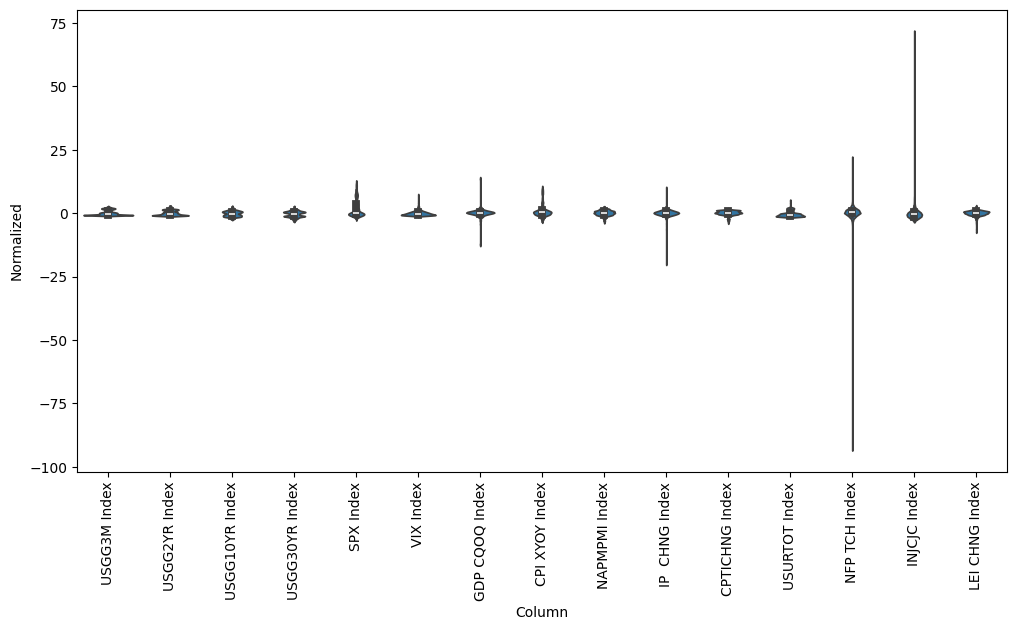

In [50]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [51]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [52]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [53]:
targets

['USGG3M Index', 'USGG2YR Index', 'USGG10YR Index', 'USGG30YR Index']

In [54]:
def plot(self, model=None, plot_col='USGG3M Index', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

In [55]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [56]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [57]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=targets)
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['USGG3M Index', 'USGG2YR Index', 'USGG10YR Index', 'USGG30YR Index']

In [58]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [59]:
print(targets)

['USGG3M Index', 'USGG2YR Index', 'USGG10YR Index', 'USGG30YR Index']


In [ ]:
baseline = Baseline(label_index=column_indices['USGG3M Index'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsolutePercentageError(),tf.keras.metrics.MeanAbsoluteError(), tf.keras.metrics.MeanSquaredError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val, return_dict=True)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0, return_dict=True)

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - loss: 0.8860 - mean_absolute_error: 0.6741 - mean_absolute_percentage_error: 80.2485 - mean_squared_error: 0.8860


In [61]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['USGG3M Index'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['USGG3M Index']

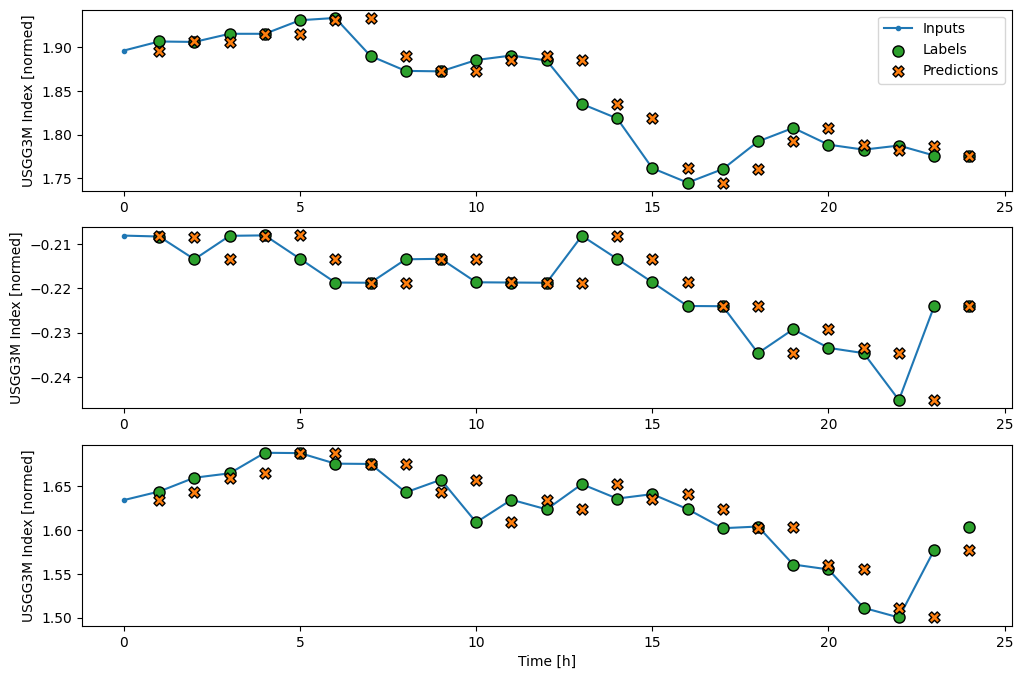

In [62]:
wide_window.plot(baseline)

In [64]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [65]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 15)
Output shape: (32, 1, 1)


In [ ]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsolutePercentageError(),tf.keras.metrics.MeanAbsoluteError(), tf.keras.metrics.MeanSquaredError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history